# Programming for Data Science and Artificial Intelligence

## Unsupervised Learning - Clustering - K-Means

### Readings:
- [VANDER] Ch5
- [HASTIE] Ch14.3
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
Name="Muhammad Omer Farooq Bhatti"
Id = "122498"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time
from sklearn.manifold import TSNE

## K-Means Clustering

In the clustering problem, we are given a training set $\{x^{(1)},\cdots,x^{(m)}\}$, and want to group the data into a few cohesive "clusters".  Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.  Here, $x^{(i)} \in \mathbb{R}^n$ as usual, but **no labels $y^{(i)}$ are given**.  Thus, this is an unsupervised learning problem.  

The *k*-means clustering algorithm is as follows:

1. Define $k$
2. Initialize cluster centroids $\mu_1, \mu_2, \cdots, \mu_k \in \mathbb{R}^n$ randomly
3. Repeat until convergence: {
            
    For every $i \in m$ , set
            
   $$c^{(i)} :=\mathop{\arg\min}_{j} ||x^{(i)} - \mu_j||^2 $$
   
   where the right part is simply the Euclidean distance equation
   
   $$d(x^{(i)}, x^{(i')}) = \sum\limits_{j=1}^n (x^{ij} - x^{i'j})^2 = ||x^{(i)} - x^{(i')}||^2$$
   
   For each $j = 1, 2, \cdots, k$, set
   
   $$\mu_j := \frac{\sum\limits_{i=1}^m I\{c^{(i)} = j\}x^{(i)}}{\sum\limits_{i=1}^m I\{c^{(i)} = j\}}$$
   
   }

In the algorithm above, $k$ is the number of clusters we want to find; and the cluster centroids $\mu_j$ represent our current guesses for the positions of the centers of the clusters. To initialize the cluster centroids, we could choose $k$ training examples randomly, and set the cluster centroids to be equal to the values of these $k$ examples. (Note that other initialization methods are also possible).

The inner loop of the algorithm repeatedly carries out two steps: 

1. "Assigning" each training example $x^{(i)}$ to the closest cluster centroid $\mu_j$, where *closest* is defined using Euclidean distance.

2. Moving each cluster centroid $\mu_j$ to the mean of the points assigned to it.  The $k$th cluster centroid is the vector of the $n$ feature means for the observations in the $k$th cluster 

**Choosing k**

To choose $k$, we define "good" clusters as having minimum **within-cluster variation**  $W(c_k)$, using the following formula:

$$W(c_k) = \sum\limits_{i \in c_k}^m \sum\limits_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

Here $\bar{x}^{(k)}$ refers to the mean belong to class $k$.  In other words, the within-cluster variation for the $k$th cluster is the sum of squared Euclidean distances between the observations and mean across all features in the $k$th cluster.  Using this equation, we can come up with **total within-cluster variation** or sometimes we call **total sum of squares**

$$W(C) = \sum\limits_{k=1}^{K}\sum\limits_{i \in c_k}^m \sum\limits_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

We can say that best k should minimize the following objective function:

$$\mathop{\min}_{k} W(C) $$

**Convergence**

Is the $k$-means algorithm guranteed to converge? Yes it is, in a certain sense.  In particular, let us define the **distortion function** to be

$$J(c, \mu) = \sum\limits_{i=1}^{m}||(x^{(i)} - \mu_{c^{(i)}}||^2$$

Thus, $J$ measures the sum of squared distances between each training example $x^{(i)}$ and the cluster centroid $\mu_{c^{(i)}}$ to which it has been assigned.  It can be shown that $k$-means is exactly coordinate descent on $J$.  Specifically, the inner-loop of $k$-means repeatedly minimizes $J$ with respect to $c$ while holding $\mu$ fixed, while holding $c$ fixed.  Thus, $J$ must monotonically decrease, and the value of $J$ must converge.  

The distortion function $J$ is a non-convex function, and so coordinate desent on $J$ is not guaranteed to converge to the global minimum.  One common way to tackle this is to run $k$-means many times using different random initial values for the cluster centroids $\mu_j$.  Then, out of all the different clusterings found, pick the one that gives the lowest distortion $J(c, \mu)$

**Relation to a bigger family of algorithm - Expectation-Maximization**

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.  The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.  Each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
![](../../Figures/em.png)

We shall soon explore a better EM algorithm called **Gaussian Mixture**.

### When to use K-means

1.  May not guarantee optimal solution.  Depends on initialization.  Can be fix by running k-means many times with different init random values.

2. Require knowing how many clusters beforehand.  Simple way is to use the elbow method which compute within clusters distances.  In sklearn, this can be easily computed using <code>kmeans inertia_ variable</code>. For scratch, this is your exercise!  

3. Assume spherical distribution.  This also means that all k-means assume that clusters have equal number of samples (which may not be true!)

4. Similar to K-nearest neighbors and MDS, k-means can be ridiciously slow for large number of samples.  One way to fix this is using the concept of Mini-Batch.  It is implemented in <code>sklearn.cluster.MiniBatchMeans</code>.  For scratch, this will be another of your exercise!

### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

In [6]:
class kmeans_clustering:
    def __init__(self, n_clusters=3, max_iter=1000, minibatch=False, batch_size=0.2):
        self.n_clusters=n_clusters
        self.centers=[]
        self.max_iter=max_iter
        self.batch_ratio = batch_size
        self.minibatch=minibatch
        
    def fit(self, X, plot=False):
    
        #Randomly choose initial center points from our X dataset
        rng = np.random.RandomState()   #<-- Random number generator with random seed 
                                          #(seed not necessary, just to ensure consistency b/w experiments)

        #Generating a random, shuffled range [0, X.shape[0]] and choosing
        #first n_clusters number elements
        idx = rng.permutation(X.shape[0])[:self.n_clusters]  
        #print("centers idx :", idx)

        self.centers = X[idx]        #choosing initial center locations from the random index list generated before

        batch_size = int(self.batch_ratio * X.shape[0])
        X_train = X
        
        for iteration in range(0, self.max_iter):
            
            if self.minibatch:
                idx = np.random.randint(X.shape[0]-1)
                #print("idx :", idx)
                X_train=X[idx:idx+batch_size]
            
            #Assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X_train, self.centers)  
                                                                 #Calculate pair-wise closest distance between all 
                                                                 #samples in X and cluster centers and returns   
                                                                 #index of closest center for every sample point
            #print("y Labels: ", labels)
            #print("X: ", X[:5])
            #print("centers")

            #Find new centers
            new_centers = []
            for cluster_idx in range(self.n_clusters):
                if np.any(labels==cluster_idx):  #<-- Check if any labels of corresponding cluster were returned
                                                 #Otherwise false boolean list is returned
                    #For every cluster, find the mean of the training samples 
                    #belonging to that cluster along every feature column
                    new_centers.append(X_train[labels == cluster_idx].mean(axis=0))
                else:
                    new_centers.append(self.centers[cluster_idx])  #if no labels of a cluster were returned
                                                                   #then use the previous center for that cluster
                    
            new_centers = np.array(new_centers)       #Convert to numpy array

            #Plot every 5th iteration
            if (iteration % 5 == 0) and plot:
                self.plot(X, new_centers, iteration)

            #Stopping criteria --> if centers do not change anymore, we stop!
            #We need to add rtol for minibatch since it does not converge.
            if(np.allclose(self.centers, new_centers, rtol=0.01)): 
                break                #Check distance between old centers and new centers
                                     #Break out of while loop if the following formula is true 
                                     #for element-wise calculations:
                                     #absolute(centers - new_centers) <= (1e-08 + 1e-05 * absolute(new_centers))
                
            else:
                self.centers = new_centers     #change centers for next iteration
        

        #print(f"Done in {iteration} iterations")
        #print(f"Centers: {self.centers}")
        cluster_variance=0
        labels = pairwise_distances_argmin(X, self.centers)  #We use X here because we want labels for all
                                                             #training samples to compute variances
        for cluster_idx in range(self.n_clusters):
            cluster_points = X[labels == cluster_idx]
            cluster_variance += np.sum((cluster_points-cluster_points.mean(axis=0))**2)                 
        #Sum of squared distance between every sample and its nearest center
        print(f"Total within cluster Variance for k={self.n_clusters}: ", cluster_variance)
        return cluster_variance

    def plot(self, X, centers, iters):
        pred = pairwise_distances_argmin(X, centers)   #<---- Get labels for new centers
        plt.figure(figsize=(5, 2))
        plt.title(f"Iteration #{iters}")
        plt.scatter(X[:, 0], X[:, 1], c=pred)
        plt.scatter(centers[:, 0], centers[:, 1], s=100, c="black", alpha=0.6)
                
    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)  #return indexes of centers against every training sample

Total within cluster Variance for k=4:  2505.045265437302


Text(0.5, 1.0, 'Final result')

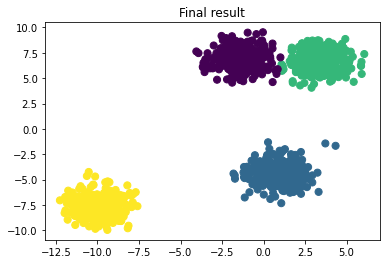

In [7]:
X, y_true = make_blobs(n_samples=1500, centers=4,          #Define random data with 4 centers cluster std 0.90
                       cluster_std=0.90, random_state=100)

model = kmeans_clustering(n_clusters=4, max_iter=10000, minibatch=True, batch_size=0.2)
sum_of_sq_distance=model.fit(X)
predictions = model.predict(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=predictions, s=50)
plt.title("Final result")

Total within cluster Variance for k=4:  185295.53515625


Text(0.5, 1.0, 'Final result')

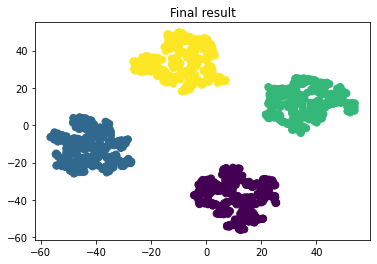

In [8]:
tsne = TSNE(n_components=2, random_state=0)
Xt=tsne.fit_transform(X)
model.fit(Xt)
predictions = model.predict(Xt)
plt.figure()
plt.scatter(Xt[:, 0], Xt[:, 1], c=predictions, s=50)
plt.title("Final result")

Total within cluster Variance for k=2:  30640.014478335514
Total within cluster Variance for k=3:  7070.562570782939
Total within cluster Variance for k=4:  2505.045265437302
Total within cluster Variance for k=5:  2306.369689359585
Total within cluster Variance for k=6:  2063.813009985419
Total within cluster Variance for k=7:  1947.9492755554809


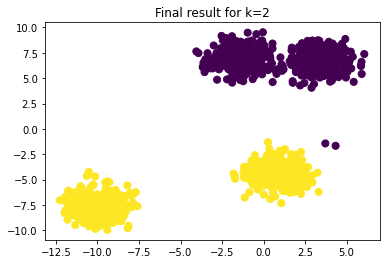

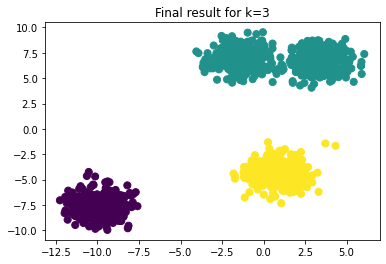

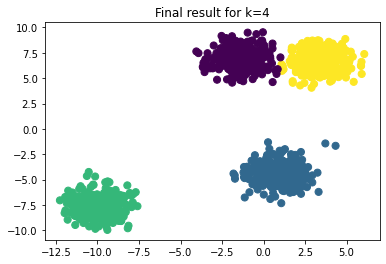

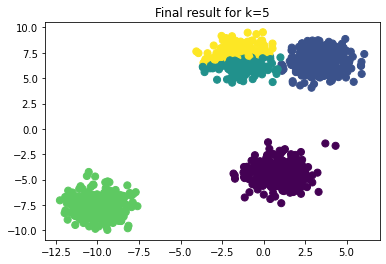

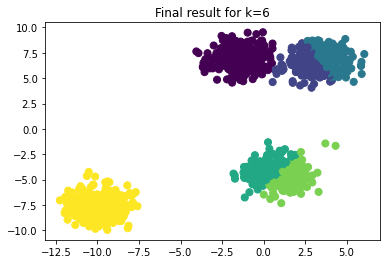

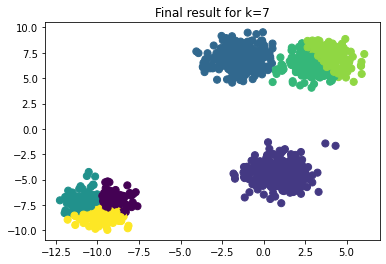

In [9]:
variance=np.zeros((6,2))                      #Within Cluster variance will go down as number of clusters increase 
for idx, k in enumerate([2, 3, 4, 5, 6, 7]):
    model = kmeans_clustering(n_clusters=k, max_iter=10000, minibatch=True, batch_size=0.2)
    sum_of_sq_distance=model.fit(X)
    predictions = model.predict(X)
    variance[idx,0], variance[idx,1] = k, sum_of_sq_distance
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=predictions, s=50)
    plt.title(f"Final result for k={k}")

Text(0.5, 1.0, 'Sum of Squares vs k = No of clusters')

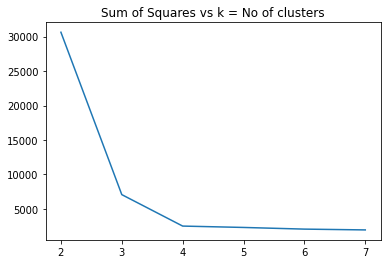

In [12]:
plt.figure()
plt.plot(variance[:,0], variance[:,1])
plt.title("Sum of Squares vs k = No of clusters")